## Importing Libraries

In [1]:
import pandas as pd   
import matplotlib.pyplot as plt
import plotly.express as px
import time
import numpy as np
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
import warnings

## Loading Dataset

We are using Apple Company stock data in this project.

In [2]:
# Importing Dataset using Pandas.
data = pd.read_csv("AAPL_Stock_Data.csv")
data.shape  

(1258, 15)

## Data Preprocessing

In [3]:
data.head()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [4]:
data = data.reset_index()
data.head()

,index,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [5]:
# Dropping Unnecessary Column.
data.drop('date',axis=1,inplace=True)
data.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
data.head()

,index,symbol,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


Lets plot the closing price of Apple Stocks

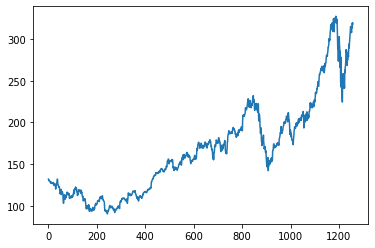

In [7]:
plt.plot(data.close)

### Calculating Moving Averages

Calculating the moving average of 100 days. For first 100 values it will be Null but it will calculate MA with 101 value.

In [8]:
mov_average_100 = data.close.rolling(100).mean()
print(mov_average_100)

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1253    290.6798
1254    290.9685
1255    291.2617
1256    291.5322
1257    291.8059
Name: close, Length: 1258, dtype: float64


In [9]:
mov_average_200 = data.close.rolling(200).mean()
print(mov_average_200)

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1253    263.742025
1254    264.287625
1255    264.917075
1256    265.516325
1257    266.115575
Name: close, Length: 1258, dtype: float64


Lets Plot closing price of our stocks with its 100 days Moving average. Moving averages are often used to identify trends in stock prices. By smoothing out the fluctuations in stock prices, moving averages can provide a clearer picture of whether a stock is trending upward or downward.

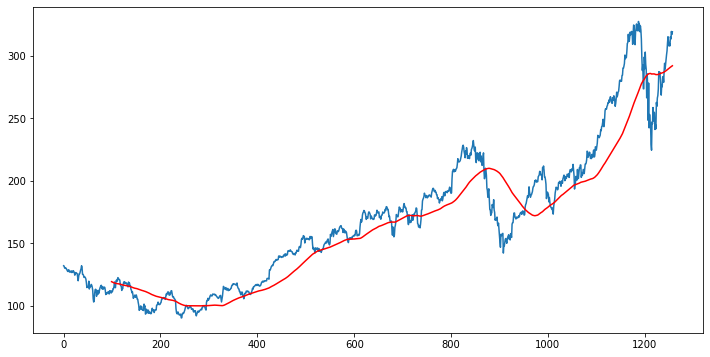

In [10]:
plt.figure(figsize = (12,6))
plt.plot(data.close)
plt.plot(mov_average_100, 'r')

In [11]:
data.shape

(1258, 14)

## Train - Test Split

In [12]:
# Splitting Data into Train - Test Set

training_data = pd.DataFrame(data['close'][0:int(len(data)*0.70)])    # Creating training dataset with 70% of total values starting from 0.
testing_data = pd.DataFrame(data['close'][int(len(data)*0.70): int(len(data))])      #Remaining 30% pass into test data

In [13]:
print(training_data.shape)
print(testing_data.shape)

(880, 1)
(378, 1)


### Scaling the Dataset

For stack LSTM model scaling is mandatory. So we are performin Min-Max scaler on the training dataset.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range= (0,1))

scaling.fit(training_data)
training_array = scaling.fit_transform(training_data)
training_array

array([[0.29425669],
       [0.29238693],
       [0.28180343],
       [0.28360262],
       [0.27954561],
       [0.28067452],
       [0.27531221],
       [0.27030269],
       [0.26430537],
       [0.26162422],
       [0.27192549],
       [0.26987935],
       [0.2598603 ],
       [0.25809638],
       [0.26289424],
       [0.26077753],
       [0.26486982],
       [0.25583857],
       [0.26296479],
       [0.2588725 ],
       [0.26649263],
       [0.26218867],
       [0.25689692],
       [0.24123333],
       [0.24754815],
       [0.25583857],
       [0.25470966],
       [0.25160516],
       [0.24941791],
       [0.22740422],
       [0.20976505],
       [0.23241374],
       [0.24920624],
       [0.24885345],
       [0.25739081],
       [0.26931489],
       [0.27714669],
       [0.29443308],
       [0.28511959],
       [0.24610174],
       [0.2456784 ],
       [0.24102166],
       [0.22881535],
       [0.23311931],
       [0.2303676 ],
       [0.22599309],
       [0.21844352],
       [0.198

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range= (0,1))

scaling.fit(testing_data)
testing_array = scaling.fit_transform(testing_data)
testing_array

array([[0.18804389],
       [0.18696287],
       [0.16269391],
       [0.17528782],
       [0.17323388],
       [0.20944814],
       [0.20193503],
       [0.19669207],
       [0.23041998],
       [0.18647641],
       [0.17582833],
       [0.14215448],
       [0.14815415],
       [0.14291119],
       [0.1454516 ],
       [0.15545106],
       [0.12588509],
       [0.11756121],
       [0.1290741 ],
       [0.10107562],
       [0.07913086],
       [0.04615967],
       [0.02507973],
       [0.0809686 ],
       [0.07545538],
       [0.07588779],
       [0.08404951],
       [0.08502243],
       [0.        ],
       [0.03280904],
       [0.03102535],
       [0.04626777],
       [0.06010486],
       [0.06275336],
       [0.05459164],
       [0.04221393],
       [0.05880763],
       [0.06891519],
       [0.0738879 ],
       [0.07907681],
       [0.06005081],
       [0.06340198],
       [0.05680774],
       [0.08415761],
       [0.07626615],
       [0.06750986],
       [0.12464191],
       [0.131

As we know, price of the next is dependent and predicted using record of past few days so we are creating trainX and trainY arrays.

In [15]:
trainX = []
trainy = []

for n in range(150, training_array.shape[0]):
    trainX.append(training_array[n - 150 : n])
    trainy.append(training_array[n,0])


# Now converting trainX and trainy into numpy array.
trainX, trainy = np.array(trainX) , np.array(trainy)

## Implementing LSTM Model

In [16]:
model = Sequential()

model.add(LSTM(units = 70, activation = 'relu', return_sequences = True, input_shape = (trainX.shape[1],1)))
model.add(Dropout(0.1))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.15))

model.add(LSTM(units = 90, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 110, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [17]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(trainX, trainy, epochs= 40)

Epoch 1/40
23/23 [==============================] - 30s 842ms/step - loss: 0.0859
Epoch 2/40
23/23 [==============================] - 21s 927ms/step - loss: 0.0313
Epoch 3/40
23/23 [==============================] - 23s 1s/step - loss: 0.0134
Epoch 4/40
23/23 [==============================] - 24s 1s/step - loss: 0.0117
Epoch 5/40
23/23 [==============================] - 24s 1s/step - loss: 0.0135
Epoch 6/40
23/23 [==============================] - 22s 956ms/step - loss: 0.0103
Epoch 7/40
23/23 [==============================] - 23s 1s/step - loss: 0.0098
Epoch 8/40
23/23 [==============================] - 22s 963ms/step - loss: 0.0113
Epoch 9/40
23/23 [==============================] - 22s 955ms/step - loss: 0.0094
Epoch 10/40
23/23 [==============================] - 23s 1s/step - loss: 0.0101
Epoch 11/40
23/23 [==============================] - 26s 1s/step - loss: 0.0092
Epoch 12/40
23/23 [==============================] - 22s 937ms/step - loss: 0.0106
Epoch 13/40
23/23 [============

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
# Generate predictions on the test set
y_pred = model.predict(testing_array)


# Calculate mean squared error
mse = mean_squared_error(testing_array, y_pred)

print('Mean Squared Error:', mse)

12/12 [==============================] - 0s 8ms/step
Mean Squared Error: 0.18093065820099238


lower MSE indicates better model performance, since it means that the predicted values are closer to the actual values.

Performing some tuning of paramters on LSTM Model

In [25]:
model = Sequential()

model.add(LSTM(units = 40, activation = 'gelu', return_sequences = True, input_shape = (trainX.shape[1],1)))
model.add(Dropout(0.1))

model.add(LSTM(units = 50, activation = 'gelu', return_sequences = True))
model.add(Dropout(0.15))

model.add(LSTM(units = 60, activation = 'gelu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 70, activation = 'gelu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'gelu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 90, activation = 'gelu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [26]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(trainX, trainy, epochs= 40)

Epoch 1/40
23/23 [==============================] - 38s 906ms/step - loss: 0.1760
Epoch 2/40
23/23 [==============================] - 20s 872ms/step - loss: 0.0764
Epoch 3/40
23/23 [==============================] - 19s 805ms/step - loss: 0.5698
Epoch 4/40
23/23 [==============================] - 18s 803ms/step - loss: 0.0899
Epoch 5/40
23/23 [==============================] - 18s 760ms/step - loss: 0.0762
Epoch 6/40
23/23 [==============================] - 19s 810ms/step - loss: 0.0745
Epoch 7/40
23/23 [==============================] - 18s 776ms/step - loss: 0.0743
Epoch 8/40
23/23 [==============================] - 18s 786ms/step - loss: 0.0729
Epoch 9/40
23/23 [==============================] - 18s 760ms/step - loss: 0.0739
Epoch 10/40
23/23 [==============================] - 18s 799ms/step - loss: 0.0732
Epoch 11/40
23/23 [==============================] - 18s 801ms/step - loss: 0.0739
Epoch 12/40
23/23 [==============================] - 18s 788ms/step - loss: 0.0733
Epoch 13/40
2

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
# Generate predictions on the test set
y_pred = model.predict(testing_array)

# Calculate mean squared error
mse = mean_squared_error(testing_array, y_pred)

print('Mean Squared Error:', mse)

12/12 [==============================] - 2s 6ms/step
Mean Squared Error: 0.1781932356550097


In [28]:
model = Sequential()

model.add(LSTM(units = 40, activation = 'elu', return_sequences = True, input_shape = (trainX.shape[1],1)))
model.add(Dropout(0.1))

model.add(LSTM(units = 50, activation = 'elu', return_sequences = True))
model.add(Dropout(0.15))

model.add(LSTM(units = 60, activation = 'elu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 70, activation = 'elu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'elu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 90, activation = 'elu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))



In [29]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(trainX, trainy, epochs= 40)

Epoch 1/40
23/23 [==============================] - 25s 645ms/step - loss: 0.0628
Epoch 2/40
23/23 [==============================] - 15s 651ms/step - loss: 0.0126
Epoch 3/40
23/23 [==============================] - 15s 644ms/step - loss: 0.0100
Epoch 4/40
23/23 [==============================] - 14s 625ms/step - loss: 0.0094
Epoch 5/40
23/23 [==============================] - 15s 636ms/step - loss: 0.0091
Epoch 6/40
23/23 [==============================] - 15s 668ms/step - loss: 0.0092
Epoch 7/40
23/23 [==============================] - 14s 627ms/step - loss: 0.0085
Epoch 8/40
23/23 [==============================] - 15s 645ms/step - loss: 0.0108
Epoch 9/40
23/23 [==============================] - 14s 624ms/step - loss: 0.0080
Epoch 10/40
23/23 [==============================] - 15s 642ms/step - loss: 0.0082
Epoch 11/40
23/23 [==============================] - 15s 656ms/step - loss: 0.0078
Epoch 12/40
23/23 [==============================] - 15s 630ms/step - loss: 0.0068
Epoch 13/40
2

In [30]:
y_pred = model.predict(testing_array)

# Calculate mean squared error
mse = mean_squared_error(testing_array, y_pred)

print('Mean Squared Error:', mse)

12/12 [==============================] - 2s 6ms/step
Mean Squared Error: 0.1629839903675576


Saving Model

In [31]:
model.save('STK_model.h5')

In [32]:
testing_data.head()

,close
880,176.98
881,176.78
882,172.29
883,174.62
884,174.24


Now to predict the price on 880 record we need data of past hundred records which are present in the training data. So we have to append that records into the dataframe.

In [33]:
previous_100_days = training_data.tail(100)
final_data = previous_100_days.append(testing_data, ignore_index = True)

In [34]:
input_data = scaling.fit_transform(final_data)

In [35]:
input_data

array([[0.23198746],
       [0.24317604],
       [0.22555538],
       [0.23355494],
       [0.24744608],
       [0.26155343],
       [0.26031025],
       [0.24695962],
       [0.26398573],
       [0.26560726],
       [0.26333712],
       [0.26625588],
       [0.26058051],
       [0.26858008],
       [0.26620183],
       [0.2671207 ],
       [0.2746338 ],
       [0.28447111],
       [0.28117399],
       [0.26371547],
       [0.257932  ],
       [0.25998595],
       [0.32057727],
       [0.35241338],
       [0.35565645],
       [0.36149397],
       [0.35089995],
       [0.35165667],
       [0.360467  ],
       [0.3531701 ],
       [0.36041295],
       [0.36516945],
       [0.36781796],
       [0.3844657 ],
       [0.40749149],
       [0.39603265],
       [0.3937625 ],
       [0.39381655],
       [0.3961948 ],
       [0.39981623],
       [0.40943733],
       [0.41895033],
       [0.4366791 ],
       [0.44775958],
       [0.46181287],
       [0.46575861],
       [0.45770499],
       [0.437

In [36]:
input_data.shape

(478, 1)

In [38]:
testX = []
testy = []

for n in range(150, input_data.shape[0]):
    testX.append(input_data[n - 150 : n])
    testy.append(input_data[n,0])


# Now converting trainX and trainy into numpy array.
testX, testy = np.array(testX) , np.array(testy)
print(testX.shape)
print(testy.shape)

(328, 150, 1)
(328,)


In [39]:
y_pred = model.predict(testX)

11/11 [==============================] - 5s 256ms/step


In [40]:
y_pred.shape

(328, 1)

In [41]:
scaling.scale_

array([0.00540511])

In [49]:
factor = 1/0.00540511
y_pred = y_pred * factor
testy = testy * factor
y_pred = y_pred.flatten()

print(y_pred.shape)
print(testy.shape)

(328,)
(328,)


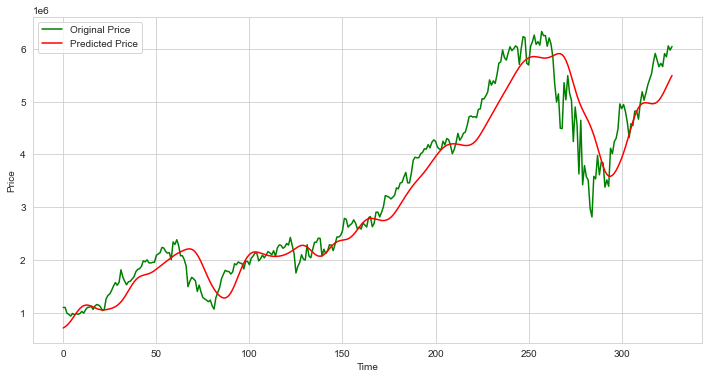

In [50]:
plt.figure(figsize= (12,6))
plt.plot(testy, 'g', label = 'Original Price')
plt.plot(y_pred, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [58]:
len(testy)

328

In [59]:
len(y_pred)

328

In [67]:
import plotly.graph_objs as go
import plotly.offline as pyo

trace1 = go.Scatter(
    x = list(range(len(testy[:228]))),
    y = testy,
    mode = 'lines',
    name = 'Original Price',
    line=dict(color='green')
)

trace2 = go.Scatter(
    x = list(range(len(y_pred[:328]))),
    y = y_pred,
    mode = 'lines',
    name = 'Predicted Price',
    line=dict(color='red')
)

data = [trace1, trace2]

layout = go.Layout(
    title = 'Predicting Next 100 Records',
    xaxis = dict(title = 'Time'),
    yaxis = dict(title = 'Price')
)

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)

## Prediction For Next 30 Days

In [70]:
trainX.shape , testX.shape

((730, 150, 1), (328, 150, 1))

In [72]:
trainy.shape , testy.shape

((730,), (328,))

In [76]:
len(testing_array)

378

In [78]:
x_input = testing_array[278:].reshape(1,-1)
x_input.shape

(1, 100)

In [79]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [80]:
temp_input     #previous 100 days data.

[0.8186584508945461,
 0.8548727095832659,
 0.8390897789308688,
 0.8518998973028485,
 0.8442786876385059,
 0.8702232311766932,
 0.9050321604237609,
 0.9088157396897464,
 0.9446516404518673,
 0.9215177557969841,
 0.9142749040592401,
 0.9353548456840172,
 0.9542186908815741,
 0.9425436462893898,
 0.948651424247338,
 0.9569212475001353,
 0.9519485433219826,
 0.9013566834225176,
 0.9485973731149667,
 0.9845413761418301,
 0.9820009729203828,
 0.9043835468353062,
 0.8997892005837523,
 0.9548673044700288,
 0.9689205988865467,
 0.9892438246581264,
 0.9612453380898328,
 0.9694611102102589,
 0.9589751905302418,
 0.9999999999999999,
 0.987406086157505,
 0.9878384952164748,
 0.9556780714555971,
 0.9806496946111022,
 0.9627047186638561,
 0.9235176476947192,
 0.8431436138587104,
 0.788551970163775,
 0.8132533376574239,
 0.7098535214312739,
 0.7089887033133345,
 0.8465488351980975,
 0.7952543105778066,
 0.8677909302199881,
 0.814712718231447,
 0.7936868277390411,
 0.670125939138425,
 0.773741959894059

In [81]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.87789077]
101
1 day input [0.85487271 0.83908978 0.8518999  0.84427869 0.87022323 0.90503216
 0.90881574 0.94465164 0.92151776 0.9142749  0.93535485 0.95421869
 0.94254365 0.94865142 0.95692125 0.95194854 0.90135668 0.94859737
 0.98454138 0.98200097 0.90438355 0.8997892  0.9548673  0.9689206
 0.98924382 0.96124534 0.96946111 0.95897519 1.         0.98740609
 0.9878385  0.95567807 0.98064969 0.96270472 0.92351765 0.84314361
 0.78855197 0.81325334 0.70985352 0.7089887  0.84654884 0.79525431
 0.86779093 0.81471272 0.79368683 0.67012594 0.77374196 0.72017729
 0.57315821 0.73390628 0.54061943 0.59818388 0.56472623 0.55451057
 0.47051511 0.44419221 0.5658613  0.55851035 0.62834441 0.5705097
 0.60872385 0.60591319 0.53359278 0.55532133 0.53629534 0.65012702
 0.63369548 0.66958543 0.67996325 0.70839414 0.7829847  0.76882331
 0.78103886 0.76001297 0.72828496 0.68201719 0.72379871 0.71801524
 0.76093184 0.76201286 0.73720339 0.78666018 0.81946922 0.79390303
 0.81600995 0.83979244 0.85638614 0

In [132]:
data = pd.read_csv("AAPL_Stock_Data.csv")
data = data[['close']]

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range= (0,1))

scaling.fit(data)
data_array = scaling.fit_transform(data)
data_array

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [82]:
day_new= np.arange(1,101)
next_30days_pred= np.arange(101,131)   # 30 days future i need to predict

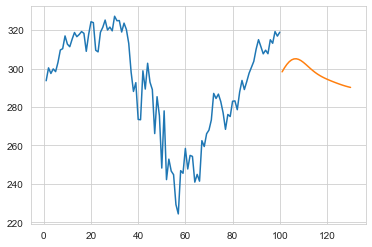

In [135]:
plt.plot(day_new,scaling.inverse_transform(data_array[1158:]))
plt.plot(next_30days_pred,scaling.inverse_transform(lst_output))